<a href="https://colab.research.google.com/github/Abdul2611/Unsupervised_Clustring_Learning/blob/main/Hierarchical_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv("student_data.csv")
df

,Student_ID,Attendance,AssignmentScore,ExamScore
0,S1,88,92,94
1,S2,78,41,75
2,S3,64,59,63
3,S4,92,67,49
4,S5,57,86,79
5,S6,70,99,99
6,S7,88,46,43
7,S8,68,83,35
8,S9,72,47,42
9,S10,60,86,97


In [3]:
X = df[["Attendance","AssignmentScore","ExamScore"]]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

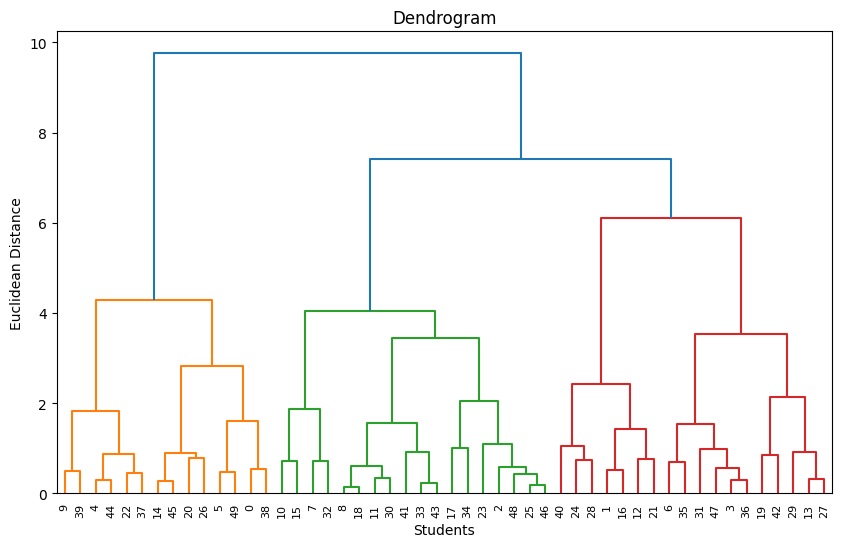

In [5]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Students")
plt.ylabel("Euclidean Distance")
plt.show()

In [6]:
he = AgglomerativeClustering(n_clusters=3,linkage="ward")
labels = he.fit_predict(X_scaled)
df['Cluster']=labels
df.head()

,Student_ID,Attendance,AssignmentScore,ExamScore,Cluster
0,S1,88,92,94,1
1,S2,78,41,75,0
2,S3,64,59,63,2
3,S4,92,67,49,0
4,S5,57,86,79,1


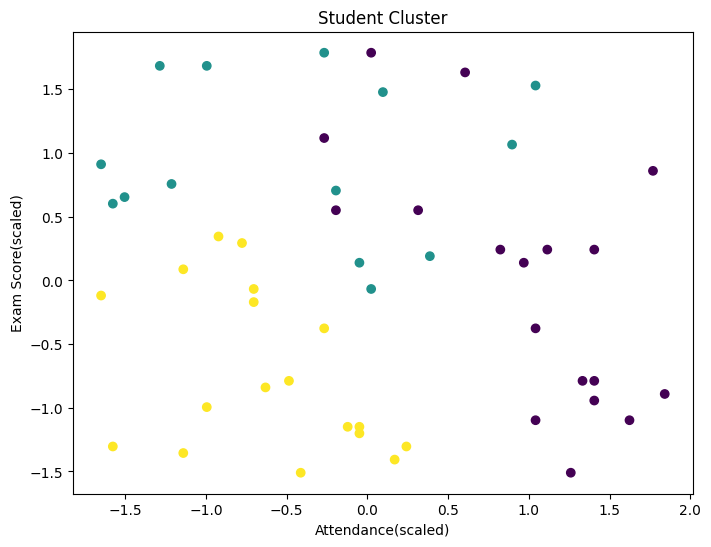

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0],X_scaled[:,2],c=labels)
plt.xlabel("Attendance(scaled)")
plt.ylabel("Exam Score(scaled)")
plt.title("Student Cluster")
plt.show()

In [8]:
df.groupby('Cluster')[['Attendance', 'AssignmentScore', 'ExamScore']].mean()

,Attendance,AssignmentScore,ExamScore
Cluster,,,
0,87.055556,61.777778,64.166667
1,67.500000,90.000000,82.500000
2,65.111111,60.777778,50.277778
